In [1]:
import io
import requests
from PIL import Image
import torch
import numpy
from datasets import load_dataset
from transformers import AutoImageProcessor, UperNetForSemanticSegmentation

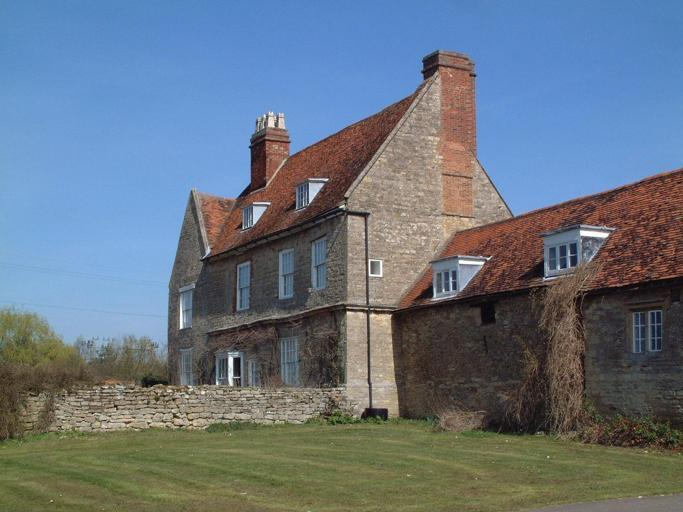

In [2]:
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])
# image = Image.open(ds[0]['file']).resize((256,256))
image

In [3]:
processor = AutoImageProcessor.from_pretrained("openmmlab/upernet-convnext-small")
model = UperNetForSemanticSegmentation.from_pretrained("openmmlab/upernet-convnext-small")

2023-11-16 09:01:50.438856: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 09:01:50.438898: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 09:01:50.438943: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt")
pixel_values = inputs["pixel_values"]

In [7]:
outputs = model.forward(pixel_values)

In [8]:
pixel_values.shape

torch.Size([1, 3, 512, 512])

In [15]:
outputs[0].shape

torch.Size([1, 150, 512, 512])

In [16]:
outputs = model.forward(pixel_values,output_hidden_states=True)

In [25]:
[outputs[1][i].shape for i in range(5)]

[torch.Size([1, 96, 128, 128]),
 torch.Size([1, 96, 128, 128]),
 torch.Size([1, 192, 64, 64]),
 torch.Size([1, 384, 32, 32]),
 torch.Size([1, 768, 16, 16])]

In [26]:
import matplotlib.pyplot as plt

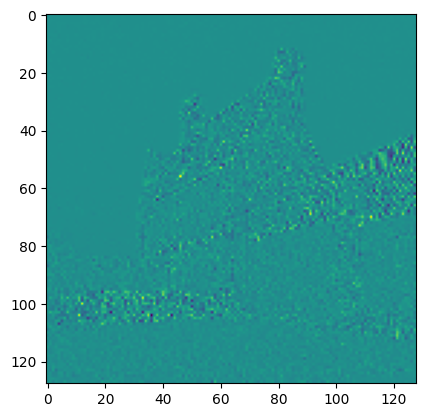

In [29]:
plt.imshow(outputs[1][0][0][0].detach())

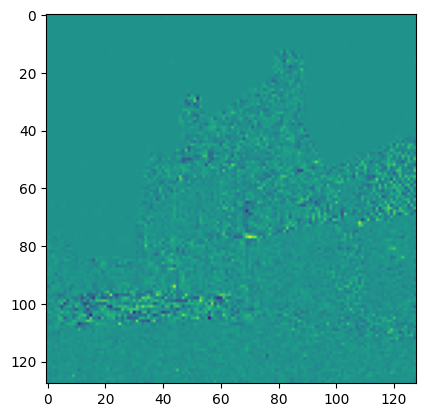

In [30]:
plt.imshow(outputs[1][0][0][1].detach())

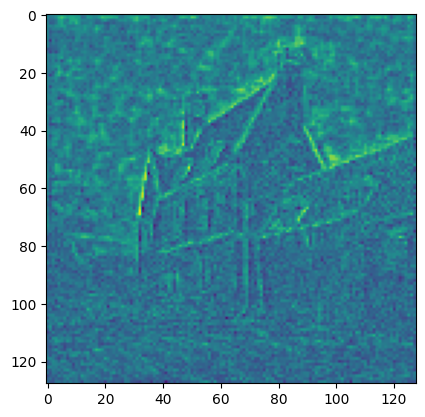

In [32]:
plt.imshow(outputs[1][1][0][0].detach())

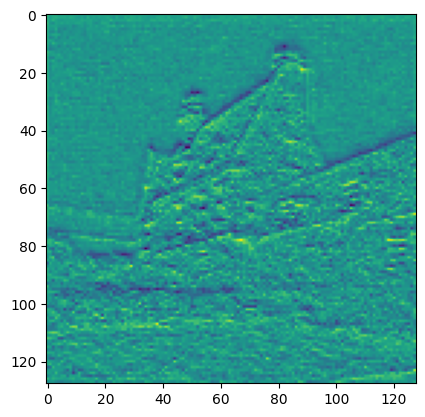

In [33]:
plt.imshow(outputs[1][1][0][1].detach())

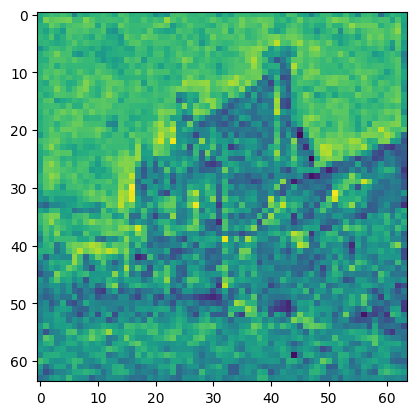

In [35]:
plt.imshow(outputs[1][2][0][0].detach())

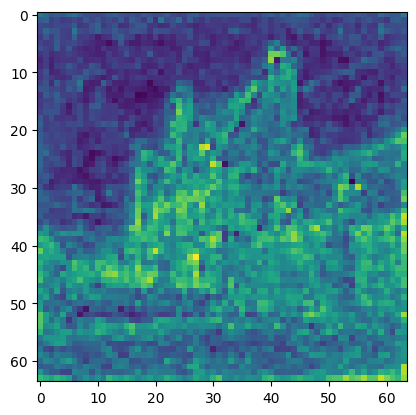

In [37]:
plt.imshow(outputs[1][2][0][1].detach())

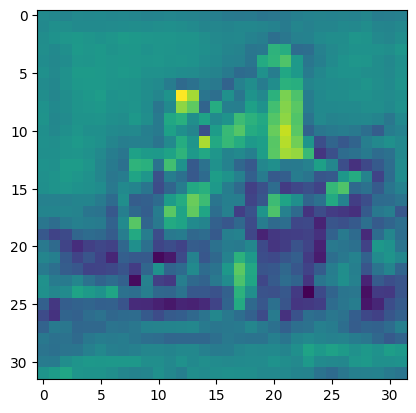

In [40]:
plt.imshow(outputs[1][3][0][0].detach())

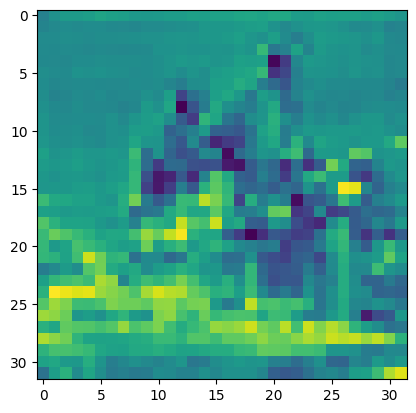

In [41]:
plt.imshow(outputs[1][3][0][1].detach())

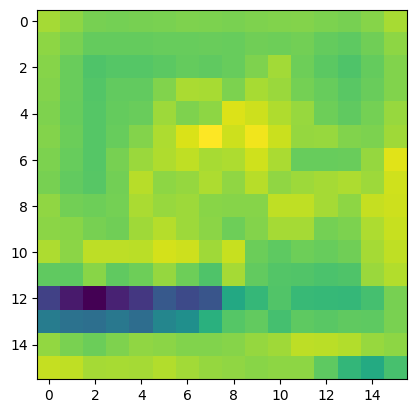

In [42]:
plt.imshow(outputs[1][4][0][0].detach())

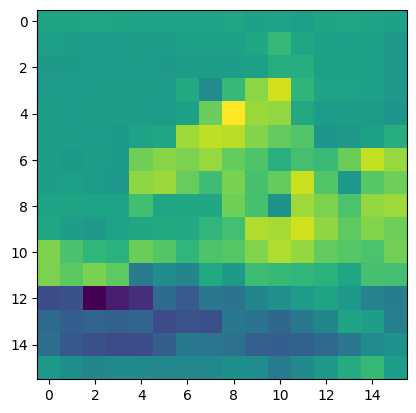

In [44]:
plt.imshow(outputs[1][4][0][1].detach())